# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:60px 0; border: double; font-size:100px">Natural Language Processing</div>

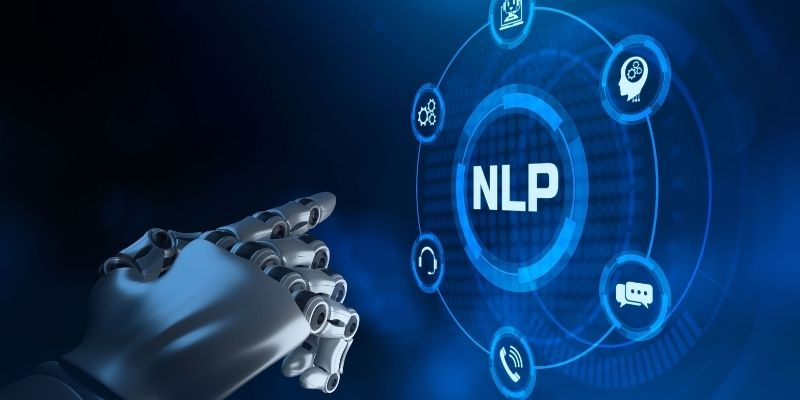

---

# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:40px 0; border: double; font-size:50px">Project Summary:</div>

## We acquired 100 READMEs from [Github's Most Starred Repos](https://github.com/search?l=%3Fspoken_language_code%3Den&p=11&q=stars%3A%3E10000&ref=advsearch&type=Repositories) (10/17/22), encoded and decoded the text, and created n-grams to predict the programming language used within the repo.

## Baseline prediction, predicting Javascript, was 25%. Our best model predicted the programming language at 60%.

---

# Imports:

In [2]:
# Imports everything from functions.py, including all libraries functions.py uses.
from functions import *

# Questions:
    - What are the most common words in READMEs?
    - Does the length of the README vary by programming language?
    - Do different programming languages use a different number of unique words?
    - Are there any words that uniquely identify a programming language?
    
# Hypothesis'
    - ReadME's that fall under the 'resources' type will be longer than other programming languages

---

# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Acquisition:</div>

In [7]:
# Take a look at the full table
df = pd.read_csv('json_data.csv', index_col=[0])
df

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"['freecodecamp', 'social', 'pull', 'request', ...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"['please', 'note', 'exists', 'official', 'acco...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"['list', 'free', 'learning', 'resource', 'many...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"['coding', 'interview', 'university', 'origina...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"['div', 'aligncenter', 'img', 'width500', 'hei...",2855,div aligncenter img width500 height350 altawes...
...,...,...,...,...,...,...,...
95,ripienaar/free-for-dev,HTML,# free-for.dev\n\nDevelopers and Open Source a...,223396,"['freefordev', 'developer', 'open', 'source', ...",17922,freefordev developer open source author massiv...
96,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,4454,"['atom', 'build', 'atom', 'repository', 'atom'...",254,atom build atom repository atom archived decem...
97,pytorch/pytorch,C++,![PyTorch Logo](https://github.com/pytorch/pyt...,22336,"['pytorch', 'pytorch', 'python', 'package', 'p...",1530,pytorch pytorch python package provides two hi...
98,angular/angular.js,JavaScript,Using AngularJS with the Closure Compiler\n===...,927,"['using', 'angularjs', 'closure', 'compiler', ...",77,using angularjs closure compiler closure compi...


In [11]:
# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         100 non-null    object
 2   readme_contents  100 non-null    object
 3   length           100 non-null    int64 
 4   clean            100 non-null    object
 5   word_count       100 non-null    int64 
 6   words            100 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [13]:
# All languages used. "Resources" was input for all without a language
df.language.value_counts()

JavaScript    25
resources     17
TypeScript    12
Python        11
C++            7
Go             7
Shell          4
Java           4
C              3
Rust           2
Vim Script     1
Clojure        1
PHP            1
Markdown       1
Vue            1
C#             1
Dart           1
HTML           1
Name: language, dtype: int64

---

# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Preparation:</div>

# Distribution before split:

In [ ]:
# See distribution of repo lengths and word counts
#count(df)

### combine with acquisition?

---

# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Exploration and Pre-Processing:</div>

# Split: Train, Validate, Test

In [14]:
#split(df)

In [ ]:
# See distribution of repos for just train
#count(train)

### charts, graphs, word frequency

# Bigrams/Trigrams:

---

# <div style="background-color:lightsteelblue; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Modeling:</div>

### models and performance

In [15]:
df.head()

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"['freecodecamp', 'social', 'pull', 'request', ...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"['please', 'note', 'exists', 'official', 'acco...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"['list', 'free', 'learning', 'resource', 'many...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"['coding', 'interview', 'university', 'origina...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"['div', 'aligncenter', 'img', 'width500', 'hei...",2855,div aligncenter img width500 height350 altawes...


In [16]:
X = df.words
y = df.language
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=536)

In [17]:
cv = CountVectorizer()

In [18]:
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=3)

In [19]:
tree.fit(X_bow, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
tree.score(X_bow, y_train)

0.4625

In [21]:
X_test_bow = cv.transform(X_test)
tree.score(X_test_bow, y_test)

0.6

In [22]:
pd.Series(
    dict(
    zip(cv.get_feature_names_out(), 
    tree.feature_importances_))).sort_values().tail()

click     0.117487
recent    0.148735
object    0.151328
book      0.209481
python    0.236744
dtype: float64

In [27]:
X_train

66    scrcpy v124 img width128 height128 altscrcpy a...
63    rust programming language main source code rep...
94    flask flask lightweight wsgi_ web application ...
96    atom build atom repository atom archived decem...
57    line need empty line c kramdown isnt smart dea...
                            ...                        
27    build youtubedl download video youtubecom vide...
34    30 second code short javascript code snippet d...
85    p aligncenter img altrevealjs width500 brbr al...
46    typescript github action devops build npm lang...
28    readmeelmd readmejamd readmekomd romnreadmerom...
Name: words, Length: 80, dtype: object

---

# <div style="background-color:salmon; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Findings:</div>

## Baseline Accuracy: 25% (Predicting Javascript as the most occurring)
### The "resources" type repo have the longest lengths and words combined, however

## 1. M

## 2. M

## 3. M

## The best model " " performed at 60%

---

# <div style="background-color:salmon; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Recommendations/Next Steps:</div>

# Recommendations:

## 1. M

## 2. M

## 3. M

# Next Steps:
### - Narrow down repositiory languages 

---